# Synthetic Population Generation with the American Community Survey Data (Maryland)

In [1]:
import os
os.getcwd()

'/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/experiments'

In [2]:
# Import libraries
import sys
import os
import numpy as np
import pandas as pd
import random
import timeit

# Get the root directory
os.chdir('/Users/william/Google Drive/gradschool/PhD/Research/Dissertation/implementations')
import utils
import ipf_utils
from utils import apply_copula, sample_copula, sample_from_bn, result_table
from ipf_utils import std_ipf, sbipf, nbipf, compute_marginals, modify_margins
from pyipu import ipu, synthesize
# Here is a bit of magic to reload external python modules
%load_ext autoreload
%autoreload 2


/opt/miniconda3/envs/popgen2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## State Level Experiment

### 10% Source

In [ ]:
# read in all the state of Maryland data
maryland = pd.read_csv('data/ACS/Maryland/maryland.csv')

# remove unwanted columns
maryland.drop(['PUMA', "COUNTY"], axis=1, inplace=True)
print(maryland.shape)

# Split data into source and target using a non-representative split
# to challenge the synthesizers.
maryland_source_10, maryland_target_10 = utils.source_target_split(maryland, low=0.5, high=1.5, split_ratio= 0.1, random_seed=123)

print(maryland_source_10.shape, maryland_target_10.shape)

(352511, 9)
(35251, 9) (317260, 9)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}


ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
Generating for node: SEX: 100%|██████████| 9/9 [00:00<00:00,  9.53it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000


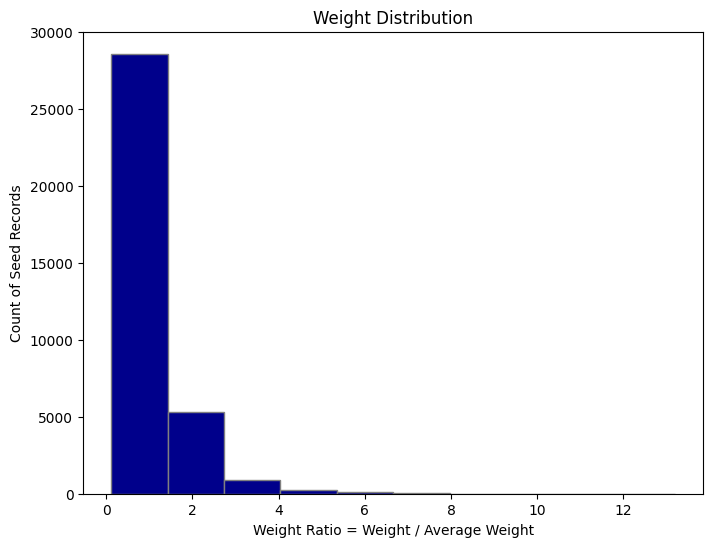

In [ ]:
#--- Run th experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
state10_result_tbl = utils.run_syn_pop_experiments(maryland_source_10, maryland_target_10, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/state_10-results.csv")
# Takes about 21 minutes to run

In [38]:
state10_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.2706,0.7265,1.5255,2.9098,0.190,0.9290,743.4303
IPF,0.0306,0.2009,0.6134,1.6607,0.053,0.0000,198.3948
IPU,0.0064,0.0494,0.1724,0.5037,0.022,0.0000,24.8208
SBIPF-GB,0.0115,0.0631,0.1960,0.5446,0.022,0.0000,1.5207
NBIPF-GB,0.0512,0.1218,0.2740,0.6413,0.023,0.0000,0.4594
SBIPF-RP,0.0338,0.1134,0.2752,0.6543,0.021,0.0000,1.6919
NBIPF-RP,0.0795,0.1992,0.4252,0.8994,0.022,0.0000,0.4260
BN,0.2715,0.8216,2.2023,5.5270,0.205,0.6146,1.1365
BN Copula,0.0041,0.3846,1.5542,4.6799,0.189,0.8447,19.6111
IPF BN,0.0355,0.3593,1.5695,5.1670,0.187,0.6249,200.8981


### 20 % Source

In [39]:
# Split data into source and target using a non-representative split
# to challenge the synthesizers.
maryland_source_20, maryland_target_20 = utils.source_target_split(maryland, low=0.5, high=1.5, split_ratio= 0.2, random_seed=123)

print(maryland_source_20.shape, maryland_target_20.shape)

(70502, 9) (282009, 9)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unorde

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000


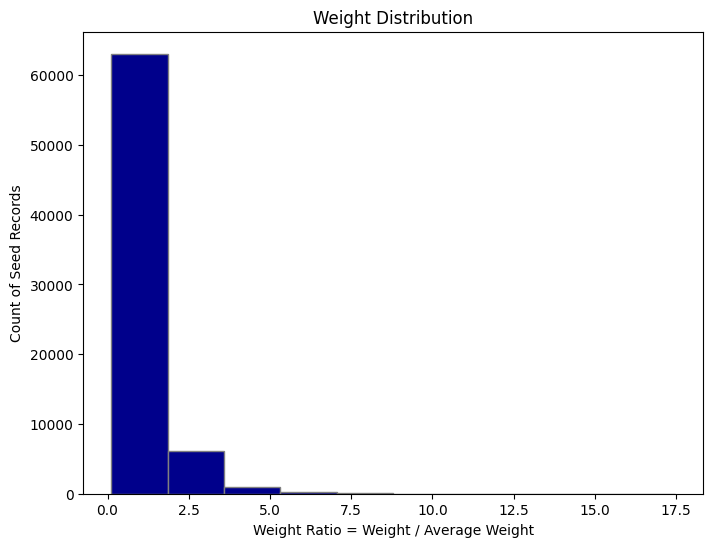

In [ ]:
#--- Run the experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
state20_result_tbl = utils.run_syn_pop_experiments(maryland_source_20, maryland_target_20, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/state_20-results.csv")
# Takes about 30 minutes to run

In [41]:
state20_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.2772,0.7422,1.5532,2.9534,0.190,0.9093,1269.8815
IPF,0.0067,0.0402,0.1348,0.3899,0.021,0.0000,129.5835
IPU,0.0042,0.0388,0.1332,0.3872,0.021,0.0000,50.1204
SBIPF-GB,0.0131,0.0563,0.1648,0.4446,0.020,0.0000,1.5709
NBIPF-GB,0.0509,0.1177,0.2503,0.5524,0.022,0.0000,0.6675
SBIPF-RP,0.0359,0.1120,0.2601,0.5904,0.020,0.0000,1.5322
NBIPF-RP,0.0823,0.1996,0.4114,0.8311,0.020,0.0000,0.6364
BN,0.2765,0.9973,2.6678,6.4233,0.179,0.4837,1.1460
BN Copula,0.0042,0.5017,1.8739,5.4064,0.160,0.7785,18.0706
IPF BN,0.0086,0.1282,0.5481,1.7490,0.168,0.5312,131.7936


## PUMA-to-PUMA Population Synthesis

### From PUMA 1201 in Anne Arundel County to PUMA 804 in Baltimore city

In [4]:
source = pd.read_csv('./data/ACS/Maryland/counties/Anne Arundel/PUMA_1201_Sample_Treated.csv').drop(["PUMA"] , axis=1)
target = pd.read_csv('./data/ACS/Maryland/counties/Baltimore City/PUMA_804_Sample_Treated.csv').drop(["PUMA"] , axis=1)
print(source.shape, target.shape)
print(source.columns.to_list())

# Align categories/levels: This ensures that both datasets have the same categories for each feature.
source, target = utils.align_categories(source, target)
print(source.shape, target.shape)

(6533, 9) (6049, 9)
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
(6533, 9) (6049, 9)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unorde

Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049


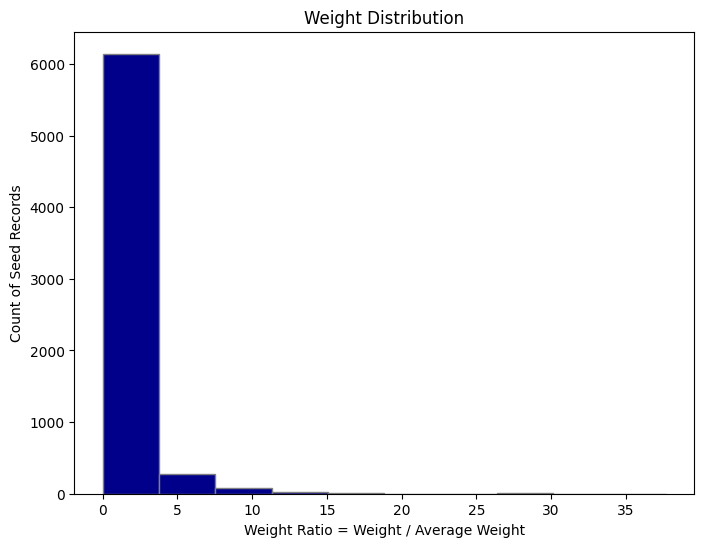

In [7]:
#--- Run th experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
result_tbl = utils.run_syn_pop_experiments(source, target, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/puma-results.csv")
# Takes about 5 minutes to run

In [10]:
result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.6093,1.3166,2.3963,4.2907,0.188,0.9816,3.6336
IPF,0.0329,0.3520,1.0699,2.7708,0.056,0.0000,154.5668
IPU,0.0301,0.3409,1.0530,2.7457,0.058,0.0000,8.7747
SBIPF-GB,0.0551,0.3872,1.1561,2.9991,0.062,0.0000,0.1435
NBIPF-GB,0.3489,0.8760,1.9695,4.4825,0.080,0.0000,0.1318
SBIPF-RP,0.0765,0.4257,1.1903,3.0408,0.066,0.0000,0.1308
NBIPF-RP,0.3733,0.9838,2.1948,4.9216,0.089,0.0000,0.1341
BN,0.6023,1.7425,4.5441,11.4899,0.207,0.8239,0.0974
BN Copula,0.0305,0.8307,3.1544,9.5083,0.183,0.9889,0.5121
IPF BN,0.0543,0.6827,2.7131,8.7874,0.178,0.9254,154.6721


### From PUMA 1201 in Anne Arundel County to PUMA 200 in Washington County

In [5]:
target = pd.read_csv('./data/ACS/Maryland/counties/Calvert/PUMA_1500_Sample_Treated.csv').drop(["PUMA"] , axis=1)
print(source.shape, target.shape)
print(source.columns.to_list())

source, target = utils.align_categories(source, target)
print(source.shape, target.shape)

(6533, 9) (8268, 9)
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
(6533, 9) (8268, 9)


In [6]:
target['RAC1P'].value_counts()

RAC1P
1    6868
2     869
9     261
6     200
8      55
3      10
5       3
7       2
Name: count, dtype: int64

/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unorde

Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268
Sample size for diversity score computation: 8268


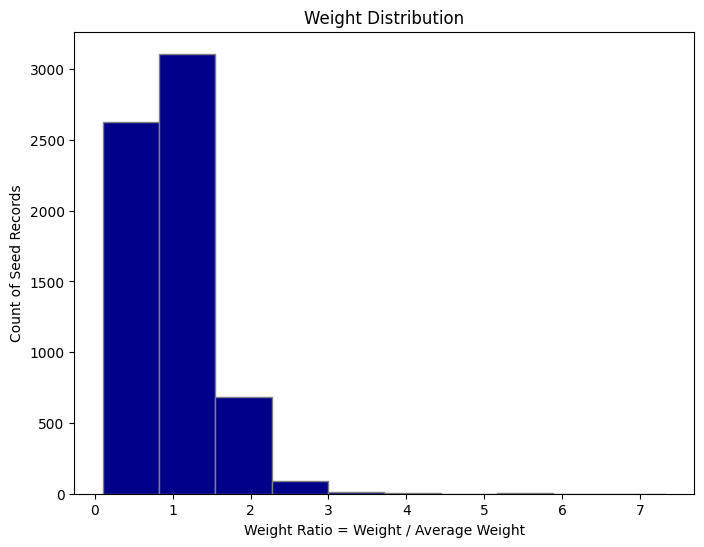

In [7]:
#--- Run the experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
result_tbl = utils.run_syn_pop_experiments(source, target, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/puma1201-to-puma1500-results.csv")
# Takes about 5 minutes to run

In [8]:
result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.1676,0.5790,1.4398,3.1695,0.192,0.9814,4.8854
IPF,0.0272,0.1707,0.5491,1.5125,0.020,0.0000,116.3155
IPU,0.0286,0.1723,0.5495,1.5113,0.018,0.0000,6.8166
SBIPF-GB,0.0303,0.1763,0.5777,1.6216,0.027,0.0000,0.1418
NBIPF-GB,0.0551,0.2107,0.5988,1.5775,0.023,0.0000,0.1569
SBIPF-RP,0.0418,0.2049,0.6290,1.7254,0.025,0.0000,0.1285
NBIPF-RP,0.0759,0.2503,0.6540,1.6428,0.021,0.0000,0.1193
BN,0.1516,0.5668,1.8623,5.6745,0.209,0.8241,0.1354
BN Copula,0.0297,0.3607,1.5650,5.3034,0.203,0.8545,0.6238
IPF BN,0.0342,0.3953,1.6690,5.5335,0.190,0.8483,116.4253


## County-to-County Population Synthesis

### From Anne Arundel County to Baltimore city

In [10]:
# read in all the state of Maryland data
maryland = pd.read_csv('data/ACS/Maryland/maryland.csv')
print(maryland.shape)
print(maryland.columns.to_list())

# Get data for the chosen counties
county_source = maryland[maryland['COUNTY']=='Anne Arundel']
county_target = maryland[maryland['COUNTY']=='Baltimore City']

# remove unwanted columns
county_source.drop(['PUMA', "COUNTY"], axis=1, inplace=True)
county_target.drop(['PUMA', "COUNTY"], axis=1, inplace=True)

print(county_source.shape, county_target.shape)

# Align categories/levels
county_source, county_target = utils.align_categories(county_source, county_target)
print(county_source.shape, county_target.shape)


(352511, 11)
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT', 'PUMA', 'COUNTY']
(22345, 9) (27103, 9)
(22344, 9) (27103, 9)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unorde

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000


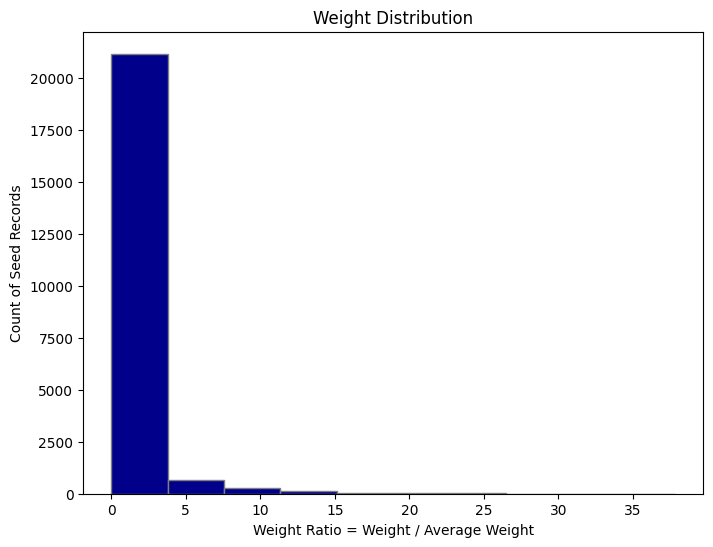

In [ ]:
#--- Run the experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
AA_BC_result_tbl = utils.run_syn_pop_experiments(county_source, county_target, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/Anne Arundel-to-Baltimore City-results.csv")
# Takes about 6 minutes to run

In [18]:
AA_BC_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.5794,1.2739,2.2238,3.7102,0.193,0.9592,43.7206
IPF,0.0150,0.1931,0.6048,1.5629,0.032,0.0000,119.2427
IPU,0.0194,0.1940,0.6017,1.5531,0.032,0.0000,19.8480
SBIPF-GB,0.0593,0.2749,0.7455,1.8478,0.036,0.0000,0.2580
NBIPF-GB,0.2592,0.5841,1.2154,2.5983,0.044,0.0000,0.2616
SBIPF-RP,0.0708,0.3124,0.8086,1.9553,0.037,0.0000,0.2765
NBIPF-RP,0.2094,0.5400,1.1590,2.4657,0.048,0.0000,0.2489
BN,0.5768,1.6715,4.0515,9.2423,0.208,0.6278,0.2085
BN Copula,0.0138,0.5566,2.0946,5.9605,0.179,0.9563,1.9194
IPF BN,0.0239,0.2904,1.1267,3.3431,0.175,0.7886,119.4914


## County-to-PUMA

In the final numerical experiment, we investigated the transferability of models from larger to smaller geographical levels, where the model is trained on data at the county level (Anne Arundel County) and then transferred to a PUMA (PUMA 1201) within that county. Attached is the results obtained. 

/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
Generating for node: RAC1P: 100%|██████████| 9/9 [00:00<00:00, 376.32it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categori

Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533
Sample size for diversity score computation: 6533


KeyError: "['RAC1P'] not found in axis"

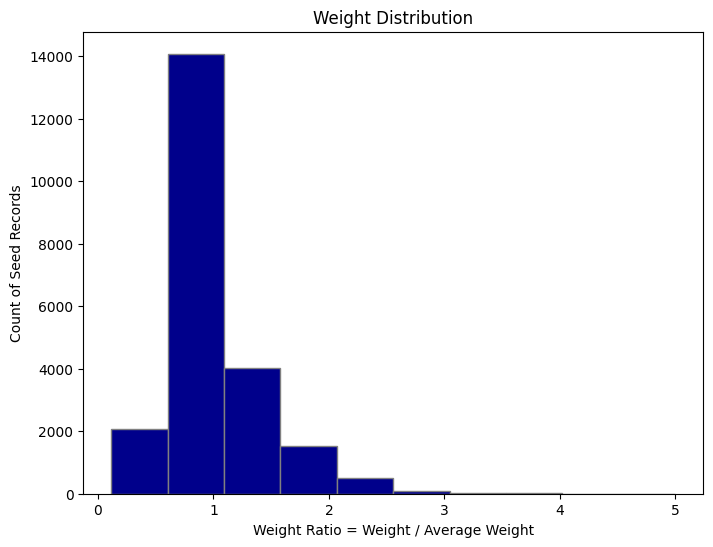

In [12]:
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
AA_puma1201_result_tbl = utils.run_syn_pop_experiments(county_source, source, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/Anne Arundel-to-PUMA1201-results.csv")

In [34]:
AA_puma_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.5838,1.2956,2.3819,4.2841,0.190,0.9578,10.1041
IPF,0.0331,0.2776,0.8308,2.1181,0.037,0.0000,130.2937
IPU,0.0345,0.2777,0.8298,2.1175,0.035,0.0000,21.6267
SBIPF-GB,0.0634,0.3524,1.0166,2.5842,0.054,0.0000,0.1741
NBIPF-GB,0.2800,0.6793,1.4588,3.1576,0.051,0.0000,0.2499
SBIPF-RP,0.0818,0.3963,1.0755,2.7054,0.058,0.0000,0.1906
NBIPF-RP,0.3039,0.7630,1.6152,3.3901,0.060,0.0000,0.2572
BN,0.5820,1.7691,4.5968,11.1825,0.206,0.6342,0.1585
BN Copula,0.0334,0.7871,3.0402,8.9498,0.175,0.9653,0.6678
IPF BN,0.0511,0.5230,2.0306,6.3027,0.206,0.8315,130.3918


# Formatting Results into LaTeX tables

In [ ]:
import pandas as pd

def df_to_latex(data={}){
    # Load the uploaded CSV files
file_10 = "/mnt/data/state_10-results.csv"
file_20 = "/mnt/data/state_20-results.csv"

df_10 = pd.read_csv(file_10)
df_20 = pd.read_csv(file_20)

# Preview the first few rows of each dataframe to understand the structure
df_10.head(), df_20.head()

# Standardize the column names and add a column to indicate the data split
df_10.columns = [col.strip() for col in df_10.columns]
df_20.columns = [col.strip() for col in df_20.columns]

df_10["Source %"] = "10%"
df_20["Source %"] = "20%"

# Combine both datasets
combined_df = pd.concat([df_10, df_20], ignore_index=True)

# Rename for better formatting in LaTeX
combined_df = combined_df.rename(columns={
    "Unnamed: 0": "Method",
    "SRMSE 1": "SRMSE$_1$",
    "SRMSE 2": "SRMSE$_2$",
    "SRMSE 3": "SRMSE$_3$",
    "SRMSE 4": "SRMSE$_4$",
    "MACD_C": "MACD$_C$",
    "Diversity": "Diversity",
    "Runtime": "Runtime (s)",
    "Source %": "Source"
})

# Reorder columns for presentation
combined_df = combined_df[["Method", "Source", "SRMSE$_1$", "SRMSE$_2$", "SRMSE$_3$", "SRMSE$_4$",
                           "MACD$_C$", "Diversity", "Runtime (s)"]]

# Generate LaTeX table
latex_table = combined_df.to_latex(index=False, float_format="%.4f", escape=False)
print(latex_table)


# Round numeric values to 3 decimal places
combined_df.iloc[:, 2:] = combined_df.iloc[:, 2:].round(3)

# Split into 10% and 20% tables for grouping purposes
df_10_grouped = combined_df[combined_df["Source"] == "10%"].drop(columns=["Source"])
df_20_grouped = combined_df[combined_df["Source"] == "20%"].drop(columns=["Source"])

# Convert each to LaTeX and insert a multicolumn header for the group
latex_10 = df_10_grouped.to_latex(index=False, float_format="%.3f", escape=False)
latex_20 = df_20_grouped.to_latex(index=False, float_format="%.3f", escape=False)

# Extract only the rows from the LaTeX tables (excluding headers and footers)
body_10 = "\n".join(latex_10.splitlines()[4:-2])
body_20 = "\n".join(latex_20.splitlines()[4:-2])

# Build the final LaTeX table with group rows
latex_grouped = r"""
\begin{table}[htbp]
\centering
\caption{Performance of Synthetic Population Generation Methods for Maryland (ACS PUMS).}
\label{tab:maryland-grouped-results}
\scriptsize
\begin{tabular}{lrrrrrrr}
\toprule
Method & SRMSE$_1$ & SRMSE$_2$ & SRMSE$_3$ & SRMSE$_4$ & MACD$_C$ & Diversity & Runtime (s) \\
\midrule
\multicolumn{8}{c}{\textbf{Source Data = 10\%}} \\
""" + body_10 + r"""

\midrule
\multicolumn{8}{c}{\textbf{Source Data = 20\%}} \\
""" + body_20 + r"""
\bottomrule
\end{tabular}
\end{table}
"""
}

print(latex_grouped)
